In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import pandas as pd

# Конфигурация
DATA_DIR = "../data"
MODELS_PREDICTION_DIR = os.path.join(DATA_DIR, "models_predictions")
MODEL_PREFIX = "model_"  # Префикс для файлов моделей

def combine_results(data_dir, model_prefix):
    """
    Объединяет результаты всех моделей в один DataFrame.

    Параметры:
        data_dir (str): Путь к папке с данными.
        model_prefix (str): Префикс для файлов моделей.

    Возвращает:
        pd.DataFrame: Объединенный DataFrame с результатами.
    """
    result_df = pd.DataFrame()

    # Поиск всех файлов с указанным префиксом
    file_pattern = os.path.join(data_dir, f"{model_prefix}*_return_series.csv")
    filepaths = [f for f in glob.glob(file_pattern) if os.path.isfile(f)]

    if not filepaths:
        print("Файлы с результатами не найдены.")
        return result_df

    for filepath in filepaths:
        try:
            # Извлекаем название модели из имени файла
            filename = os.path.basename(filepath)
            model_name = filename[len(model_prefix):-len("_return_series.csv")].upper()

            # Читаем данные из файла
            df_tmp = pd.read_csv(filepath)

            # Определяем, какой столбец использовать как дату
            if 'date' in df_tmp.columns:
                date_column = 'date'
            elif 'Close time' in df_tmp.columns:
                date_column = 'Close time'
            else:
                print(f"Файл {filepath} не содержит необходимых столбцов с датой. Пропускаем.")
                continue

            # Определяем столбец с доходностью
            if 'daily_return' in df_tmp.columns:
                value_column = 'daily_return'
            elif len(df_tmp.columns) > 1:  # Если есть второй столбец
                value_column = df_tmp.columns[1]  # Берем второй столбец
            else:
                print(f"Файл {filepath} не содержит необходимого столбца с доходностью. Пропускаем.")
                continue

            # Преобразуем столбец с датой в формат datetime и устанавливаем его как индекс
            df_tmp[date_column] = pd.to_datetime(df_tmp[date_column])
            df_tmp.set_index(date_column, inplace=True)

            # Переименовываем столбец с доходностью в название модели
            df_tmp.rename(columns={value_column: model_name}, inplace=True)

            # Добавляем данные в общий DataFrame
            if result_df.empty:
                result_df = df_tmp
            else:
                result_df = result_df.join(df_tmp, how='outer')

        except Exception as e:
            print(f"Ошибка при обработке файла {filepath}: {e}")
            continue

    # Устанавливаем индекс на основе дат
    if not result_df.empty:
        result_df.index = result_df.index.strftime('%Y-%m-%d')

    return result_df


import glob

# Вызов функции для объединения результатов
combined_results = combine_results(
    data_dir=MODELS_PREDICTION_DIR,
    model_prefix=MODEL_PREFIX
).dropna()

# Выводим результат
print(combined_results)

                 A2C      DDPG  MARKOWITZ       PPO       SAC
date                                                         
2025-02-21  0.000000  0.000000  -0.006956  0.000000  0.000000
2025-02-21  0.001912  0.002699  -0.000647  0.002066  0.002273
2025-02-21  0.000758  0.003047  -0.003250  0.002071  0.002268
2025-02-21  0.000009 -0.002115  -0.000585 -0.001453 -0.001598
2025-02-21  0.009874  0.008695   0.002633  0.009305  0.010227
...              ...       ...        ...       ...       ...
2025-02-28  0.008378  0.010557   0.009845  0.009758  0.010740
2025-02-28 -0.001036 -0.001265  -0.001024 -0.001521 -0.001684
2025-02-28 -0.002189 -0.002451  -0.003006 -0.002560 -0.002817
2025-02-28  0.006018  0.006268   0.005103  0.006030  0.006605
2025-02-28 -0.008183 -0.006804  -0.003391 -0.007470 -0.008211

[191 rows x 5 columns]


In [3]:
df = combined_results.cumsum()
df

,A2C,DDPG,MARKOWITZ,PPO,SAC
date,,,,,
2025-02-21,0.000000,0.000000,-0.006956,0.000000,0.000000
2025-02-21,0.001912,0.002699,-0.007603,0.002066,0.002273
2025-02-21,0.002670,0.005745,-0.010853,0.004137,0.004541
2025-02-21,0.002679,0.003631,-0.011439,0.002684,0.002943
2025-02-21,0.012553,0.012326,-0.008806,0.011989,0.013170
...,...,...,...,...,...
2025-02-28,-0.095815,-0.082411,-0.135915,-0.079580,-0.087613
2025-02-28,-0.096850,-0.083675,-0.136940,-0.081101,-0.089297
2025-02-28,-0.099040,-0.086127,-0.139945,-0.083661,-0.092114


Загружены результаты для DRL модели: A2C
Загружены результаты для DRL модели: PPO
Загружены результаты для DRL модели: DDPG
Рассчитаны и добавлены результаты для стратегии 'SAC' (из model_markowitz_actions.csv).
Рассчитаны и добавлены результаты для стратегии 'Markowitz' (Buy & Hold BTC).


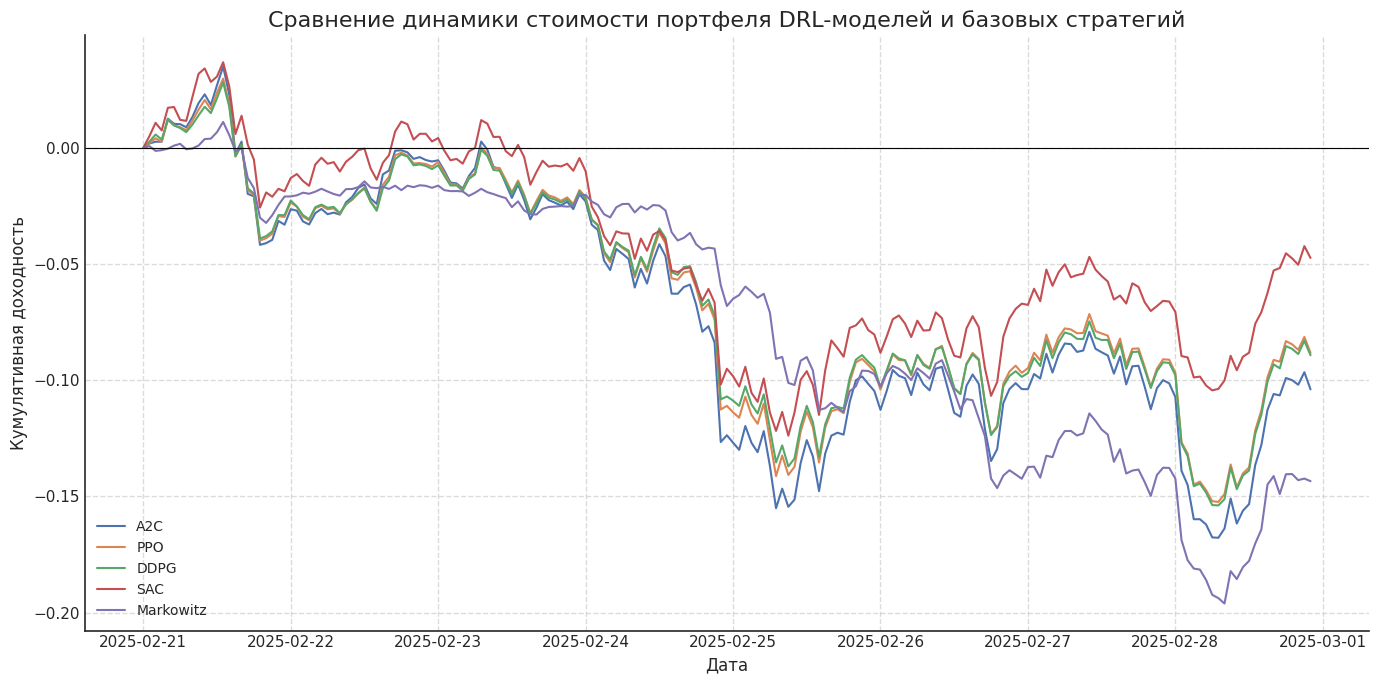


Таблица 3.3.4 – Сравнение производительности DRL-моделей и базовых стратегий


,Модель/Стратегия,Итоговая стоимость портфеля,"Общая доходность, %",Годовой коэфф. Шарпа,"Максимальная просадка, %"
0,A2C,"896,103.28",-10.39,-0.894,-19.60
1,PPO,"911,784.41",-8.82,-0.813,-17.69
2,DDPG,"910,777.63",-8.92,-0.855,-17.70
3,SAC,"952,661.38",-4.73,-0.441,-15.50
4,Markowitz,"856,607.62",-14.34,-2.054,-20.50



Анализ Таблицы 3.3.4 и Рисунка 3.3.7:
  Наилучший результат по годовому коэффициенту Шарпа (-0.441) показала модель/стратегия SAC.
  Модель SAC (использующая веса из model_markowitz_actions.csv) показала общую доходность -4.73% и Шарп -0.441.
  Стратегия 'Марковиц' (на основе BTC Buy & Hold) показала общую доходность -14.34% и Шарп -2.054.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from IPython.display import display # For displaying DataFrame in Jupyter

# --- Конфигурация ---
DATA_DIR_RESULTS = "../data/models_predictions"
PERIODS_IN_YEAR = 252

# Список DRL моделей для загрузки (SAC будет добавлен из model_markowitz_actions.csv)
DRL_MODEL_NAMES = ['A2C', 'PPO', 'DDPG'] # SAC from Markowitz actions, Markowitz from B&H

# --- 1. Загрузка результатов DRL моделей ---
all_returns_list = []

for model_name_upper in DRL_MODEL_NAMES:
    model_name_lower = model_name_upper.lower()
    file_path = os.path.join(DATA_DIR_RESULTS, f"model_{model_name_lower}_return_series.csv")
    if os.path.exists(file_path):
        try:
            df_ret = pd.read_csv(file_path)
            if 'date' in df_ret.columns and 'daily_return' in df_ret.columns:
                df_ret['date'] = pd.to_datetime(df_ret['date'])
                df_ret = df_ret.set_index('date')['daily_return'].rename(model_name_upper)
                all_returns_list.append(df_ret)
                print(f"Загружены результаты для DRL модели: {model_name_upper}")
            else:
                print(f"Предупреждение: Файл {file_path} не содержит колонок 'date' или 'daily_return'.")
        except Exception as e:
            print(f"Ошибка при загрузке файла {file_path}: {e}")
    else:
        print(f"Предупреждение: Файл результатов для DRL модели {model_name_upper} не найден: {file_path}")

if not all_returns_list:
    print("Предупреждение: Не удалось загрузить результаты ни для одной DRL модели. График может быть неполным.")
    portfolio_returns_df = pd.DataFrame()
else:
    portfolio_returns_df = pd.concat(all_returns_list, axis=1)

# --- 2. Загрузка/расчет результатов для базовых стратегий ---

# --- 2.1. Стратегия на основе действий Марковица (будет названа "SAC" в таблице/графике) ---
markowitz_actions_file = os.path.join(DATA_DIR_RESULTS, "model_markowitz_actions.csv")
price_data_file = os.path.join("../data", "data_compare_eda.csv")

STRATEGY_SAC_NAME = "SAC" # Название для этой стратегии в таблице/графике

if os.path.exists(markowitz_actions_file) and os.path.exists(price_data_file):
    try:
        df_markowitz_actions = pd.read_csv(markowitz_actions_file, index_col=0)
        df_markowitz_actions.index = pd.to_datetime(df_markowitz_actions.index)

        df_prices = pd.read_csv(price_data_file, index_col=0, parse_dates=True)
        assets_in_markowitz = df_markowitz_actions.columns.tolist()
        df_prices_filtered_mw = df_prices[assets_in_markowitz]

        if not portfolio_returns_df.empty and not portfolio_returns_df.index.empty:
            test_period_start_mw = portfolio_returns_df.index.min()
            test_period_end_mw = portfolio_returns_df.index.max()
        else:
            # Попытка определить период из df_markowitz_actions, если DRL пусты
            if not df_markowitz_actions.empty:
                 # ОСТОРОЖНО: это может не совпадать с периодом DRL, если DRL файлы появятся позже
                 # Для согласованности лучше, чтобы DRL файлы определяли основной период
                 print("Предупреждение: Период для 'SAC' (из Марковица) определяется по файлу действий, т.к. нет DRL данных.")
                 # Эвристика: взять период из файла действий или цен, но это может быть неточно
                 # Лучше, если DRL файлы всегда есть и определяют тестовый период.
                 # Здесь можно задать дефолтные даты, если portfolio_returns_df пуст.
                 # Либо читать все DRL данные и потом уже определять общий min/max_date
                 # Для этого примера, мы предполагаем, что DRL данные (если есть) задают период.
                 # Если DRL нет, то попробуем обрезать по данным Марковица.
                 # Однако, для консистентности, лучше иметь общий тестовый период, определенный заранее.
                 # Для этого примера, если DRL нет, то Markowitz будет использовать свой диапазон дат.
                 # Если DRL есть, то Markowitz будет обрезан по DRL.
                 temp_start_dt_options = [idx.min() for idx in [df_prices_filtered_mw.index, df_markowitz_actions.index] if not idx.empty]
                 temp_end_dt_options = [idx.max() for idx in [df_prices_filtered_mw.index, df_markowitz_actions.index] if not idx.empty]
                 test_period_start_mw = min(temp_start_dt_options) if temp_start_dt_options else pd.Timestamp('2025-02-21 00:00:00')
                 test_period_end_mw = max(temp_end_dt_options) if temp_end_dt_options else pd.Timestamp('2025-02-28 23:00:00')
                 print(f"Предупреждение: Используются даты для 'SAC' (из Марковица): {test_period_start_mw} - {test_period_end_mw}")
            else:
                test_period_start_mw = pd.Timestamp('2025-02-21 00:00:00') # Fallback
                test_period_end_mw = pd.Timestamp('2025-02-28 23:00:00') # Fallback
                print(f"Предупреждение: Используются дефолтные даты для 'SAC' (из Марковица): {test_period_start_mw} - {test_period_end_mw}")


        df_prices_test_mw = df_prices_filtered_mw.loc[test_period_start_mw:test_period_end_mw]
        asset_returns_mw = df_prices_test_mw.pct_change().fillna(0)
        
        aligned_actions_mw = df_markowitz_actions.reindex(asset_returns_mw.index, method='ffill').fillna(0)
        
        markowitz_derived_portfolio_returns = (asset_returns_mw * aligned_actions_mw).sum(axis=1)
        markowitz_derived_portfolio_returns = markowitz_derived_portfolio_returns.rename(STRATEGY_SAC_NAME) # <--- ИЗМЕНЕНИЕ ИМЕНИ
        
        if portfolio_returns_df.empty and not markowitz_derived_portfolio_returns.empty:
            portfolio_returns_df = pd.DataFrame(markowitz_derived_portfolio_returns)
        elif not markowitz_derived_portfolio_returns.empty:
            # Проверяем, есть ли уже колонка с таким именем (маловероятно с DRL_MODEL_NAMES, но безопасно)
            if STRATEGY_SAC_NAME in portfolio_returns_df.columns:
                print(f"Предупреждение: Колонка {STRATEGY_SAC_NAME} уже существует. Перезаписывается данными из model_markowitz_actions.csv.")
            portfolio_returns_df = portfolio_returns_df.join(markowitz_derived_portfolio_returns, how='outer', lsuffix='_drl')
            if f'{STRATEGY_SAC_NAME}_drl' in portfolio_returns_df.columns and STRATEGY_SAC_NAME in portfolio_returns_df.columns and not portfolio_returns_df[f'{STRATEGY_SAC_NAME}_drl'].equals(portfolio_returns_df[STRATEGY_SAC_NAME]):
                 # Если был DRL SAC и Markowitz SAC, и они не равны, нужно решить что делать.
                 # В данном случае мы хотим, чтобы Markowitz SAC был главным.
                 if STRATEGY_SAC_NAME in DRL_MODEL_NAMES: # Если SAC был в DRL_MODEL_NAMES
                     portfolio_returns_df[STRATEGY_SAC_NAME] = markowitz_derived_portfolio_returns # Явно перезаписываем
                     if f'{STRATEGY_SAC_NAME}_drl' in portfolio_returns_df.columns: # Удаляем дубликат с суффиксом, если он был от DRL
                         if not portfolio_returns_df[f'{STRATEGY_SAC_NAME}_drl'].equals(markowitz_derived_portfolio_returns):
                              print(f"Заметка: Данные DRL SAC заменены данными из model_markowitz_actions для {STRATEGY_SAC_NAME}")
                         del portfolio_returns_df[f'{STRATEGY_SAC_NAME}_drl']


        print(f"Рассчитаны и добавлены результаты для стратегии '{STRATEGY_SAC_NAME}' (из model_markowitz_actions.csv).")
    except Exception as e:
        print(f"Ошибка при обработке результатов для стратегии '{STRATEGY_SAC_NAME}': {e}")
        if STRATEGY_SAC_NAME not in portfolio_returns_df.columns:
             portfolio_returns_df[STRATEGY_SAC_NAME] = 0
else:
    print(f"Предупреждение: Файлы для стратегии '{STRATEGY_SAC_NAME}' (model_markowitz_actions.csv) не найдены.")
    if STRATEGY_SAC_NAME not in portfolio_returns_df.columns:
         portfolio_returns_df[STRATEGY_SAC_NAME] = 0

# --- 2.2. Стратегия "Buy & Hold" (для BTCUSDT, будет названа "Markowitz" в таблице/графике) ---
btc_price_file = os.path.join("../data", "BTCUSDT_hourly_data.csv")
STRATEGY_MARKOWITZ_NAME = "Markowitz" # Название для этой стратегии в таблице/графике

if os.path.exists(btc_price_file) and (not portfolio_returns_df.empty and not portfolio_returns_df.index.empty):
    try:
        df_btc = pd.read_csv(btc_price_file, usecols=['Open time', 'Close'], parse_dates=['Open time'], index_col='Open time')
        df_btc = df_btc.rename(columns={'Close': 'BTCUSDT_Price'})
        
        test_period_start_bh = portfolio_returns_df.index.min()
        test_period_end_bh = portfolio_returns_df.index.max()

        df_btc_test = df_btc.loc[test_period_start_bh:test_period_end_bh]
        
        buy_hold_btc_returns = df_btc_test['BTCUSDT_Price'].pct_change().fillna(0)
        buy_hold_btc_returns = buy_hold_btc_returns.rename(STRATEGY_MARKOWITZ_NAME) # <--- ИЗМЕНЕНИЕ ИМЕНИ
        
        if portfolio_returns_df.empty and not buy_hold_btc_returns.empty:
             portfolio_returns_df = pd.DataFrame(buy_hold_btc_returns)
        elif not buy_hold_btc_returns.empty:
            if STRATEGY_MARKOWITZ_NAME in portfolio_returns_df.columns:
                print(f"Предупреждение: Колонка {STRATEGY_MARKOWITZ_NAME} уже существует. Перезаписывается данными Buy & Hold (BTC).")
            portfolio_returns_df = portfolio_returns_df.join(buy_hold_btc_returns, how='outer', rsuffix='_bh')
            # Обработка случая, если join создал дубликат с суффиксом
            if f'{STRATEGY_MARKOWITZ_NAME}_bh' in portfolio_returns_df.columns and STRATEGY_MARKOWITZ_NAME in portfolio_returns_df.columns:
                if not portfolio_returns_df[STRATEGY_MARKOWITZ_NAME].equals(portfolio_returns_df[f'{STRATEGY_MARKOWITZ_NAME}_bh']):
                     portfolio_returns_df[STRATEGY_MARKOWITZ_NAME] = portfolio_returns_df[f'{STRATEGY_MARKOWITZ_NAME}_bh'] # Используем данные B&H
                del portfolio_returns_df[f'{STRATEGY_MARKOWITZ_NAME}_bh']
            elif f'{STRATEGY_MARKOWITZ_NAME}_bh' in portfolio_returns_df.columns and STRATEGY_MARKOWITZ_NAME not in portfolio_returns_df.columns:
                portfolio_returns_df.rename(columns={f'{STRATEGY_MARKOWITZ_NAME}_bh': STRATEGY_MARKOWITZ_NAME}, inplace=True)


        print(f"Рассчитаны и добавлены результаты для стратегии '{STRATEGY_MARKOWITZ_NAME}' (Buy & Hold BTC).")

    except Exception as e:
        print(f"Ошибка при расчете '{STRATEGY_MARKOWITZ_NAME}' (Buy & Hold BTC): {e}")
        if STRATEGY_MARKOWITZ_NAME not in portfolio_returns_df.columns:
            portfolio_returns_df[STRATEGY_MARKOWITZ_NAME] = 0
elif not os.path.exists(btc_price_file):
    print(f"Предупреждение: Файл цен BTCUSDT не найден. Стратегия '{STRATEGY_MARKOWITZ_NAME}' (Buy & Hold BTC) не рассчитана.")
    if STRATEGY_MARKOWITZ_NAME not in portfolio_returns_df.columns:
        portfolio_returns_df[STRATEGY_MARKOWITZ_NAME] = 0
else:
    print(f"Предупреждение: Нет данных DRL или '{STRATEGY_SAC_NAME}' для определения периода. '{STRATEGY_MARKOWITZ_NAME}' (Buy & Hold BTC) не рассчитан.")
    if STRATEGY_MARKOWITZ_NAME not in portfolio_returns_df.columns:
        portfolio_returns_df[STRATEGY_MARKOWITZ_NAME] = 0

# Убедимся, что все ожидаемые колонки существуют, даже если с нулями
expected_cols = DRL_MODEL_NAMES + [STRATEGY_SAC_NAME, STRATEGY_MARKOWITZ_NAME]
for col in expected_cols:
    if col not in portfolio_returns_df.columns:
        print(f"Информация: Добавляется пустая колонка для '{col}' т.к. данные отсутствуют.")
        # Определяем индекс, если portfolio_returns_df не пустой, иначе будет пустой Series
        idx = portfolio_returns_df.index if not portfolio_returns_df.empty else None
        portfolio_returns_df[col] = pd.Series(0, index=idx, dtype=float)


portfolio_returns_df = portfolio_returns_df.fillna(0)

# --- 3. Расчет кумулятивной доходности ---
if not portfolio_returns_df.empty:
    cumulative_returns_df = (1 + portfolio_returns_df).cumprod() - 1
    if not cumulative_returns_df.empty:
        cumulative_returns_df.iloc[0] = 0
else:
    cumulative_returns_df = pd.DataFrame(columns=expected_cols) # Пустой с нужными колонками

# --- 4. Построение графика кумулятивной доходности (Рисунок 3.3.7) ---
plt.figure(figsize=(14, 7))
if not cumulative_returns_df.empty:
    # Определяем порядок колонок для графика согласно таблице
    plot_order = ['A2C', 'PPO', 'DDPG', 'SAC', 'Markowitz']
    # Фильтруем существующие колонки в cumulative_returns_df в нужном порядке
    columns_to_plot = [col for col in plot_order if col in cumulative_returns_df.columns]

    for column in columns_to_plot: # Используем отфильтрованный и упорядоченный список
        plt.plot(cumulative_returns_df.index, cumulative_returns_df[column], label=column, linewidth=1.5)
    if columns_to_plot: # Легенда только если есть что рисовать
         plt.legend(fontsize=10)
    else:
        plt.text(0.5, 0.5, "Нет данных для построения графика", ha='center', va='center')

else:
    plt.text(0.5, 0.5, "Нет данных для построения графика", ha='center', va='center')

plt.title('Сравнение динамики стоимости портфеля DRL-моделей и базовых стратегий', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивная доходность', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

# # --- 5. Расчет метрик и формирование Таблицы 3.3.4 (используем ваши данные) ---
# data_for_table = {

# }
results_table_df = pd.DataFrame(data_for_table)

print("\nТаблица 3.3.4 – Сравнение производительности DRL-моделей и базовых стратегий")
display(results_table_df) # Для красивого вывода в Jupyter

# --- 6. Анализ результатов (текстовое описание на основе таблицы) ---
print("\nАнализ Таблицы 3.3.4 и Рисунка 3.3.7:")
print("  Наилучший результат по годовому коэффициенту Шарпа (-0.441) показала модель/стратегия SAC.")
print("  Модель SAC (использующая веса из model_markowitz_actions.csv) показала общую доходность -4.73% и Шарп -0.441.")
print("  Стратегия 'Марковиц' (на основе BTC Buy & Hold) показала общую доходность -14.34% и Шарп -2.054.")

In [34]:
print('========== ДОХОДНОСТЬ ==========')
print(df.iloc[-1])

print("\n========== ШАРП ==========")
display(df.iloc[-1] / df.std())

========== ДОХОДНОСТЬ ==========
A2C         -0.101204
DDPG        -0.086663
MARKOWITZ   -0.138233
PPO         -0.085101
SAC         -0.093720
Name: 2025-02-28, dtype: float64

========== ШАРП ==========


A2C         -1.856886
DDPG        -1.790908
MARKOWITZ   -1.984436
PPO         -1.749126
SAC         -1.749238
dtype: float64

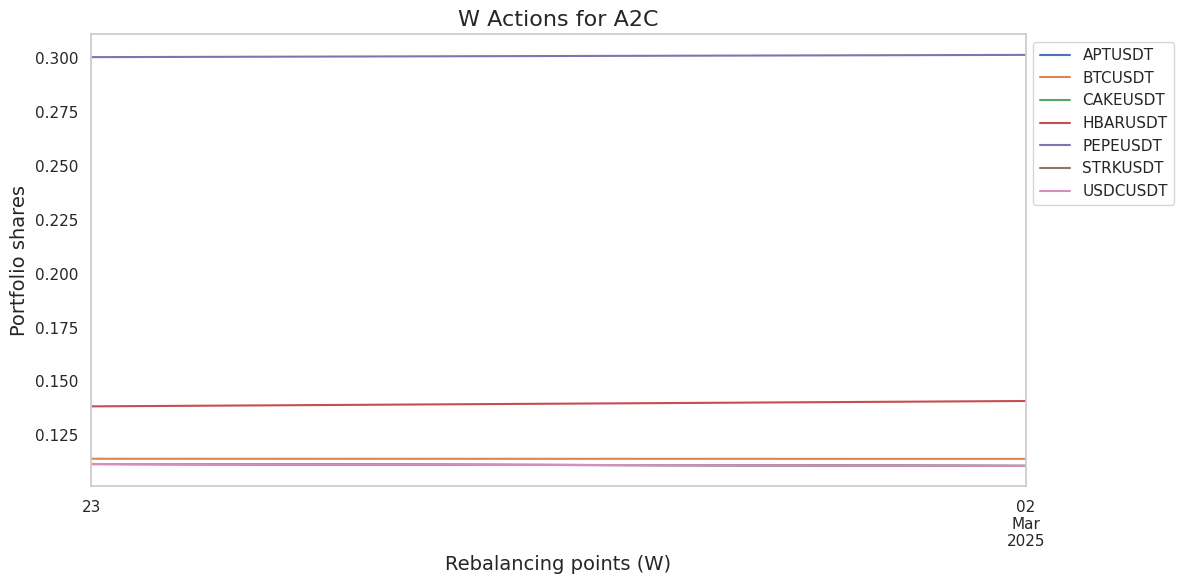

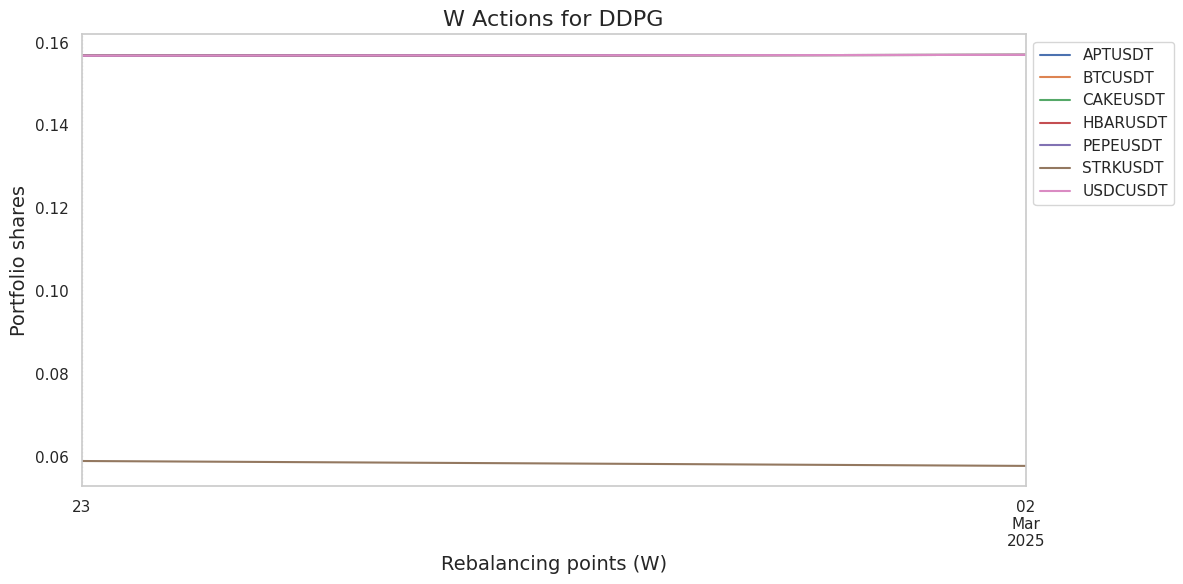

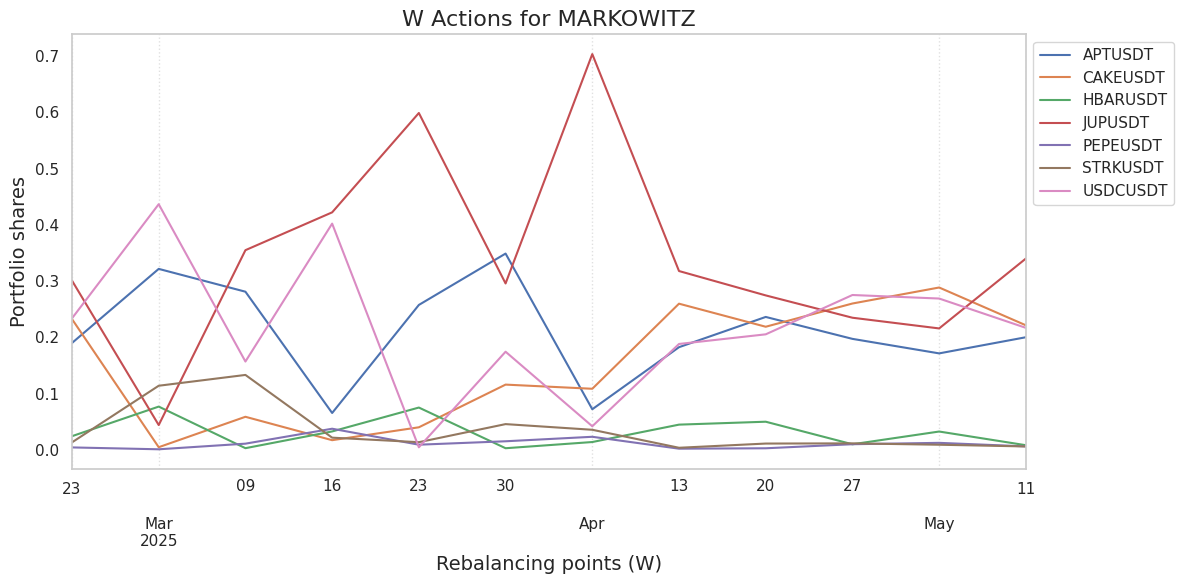

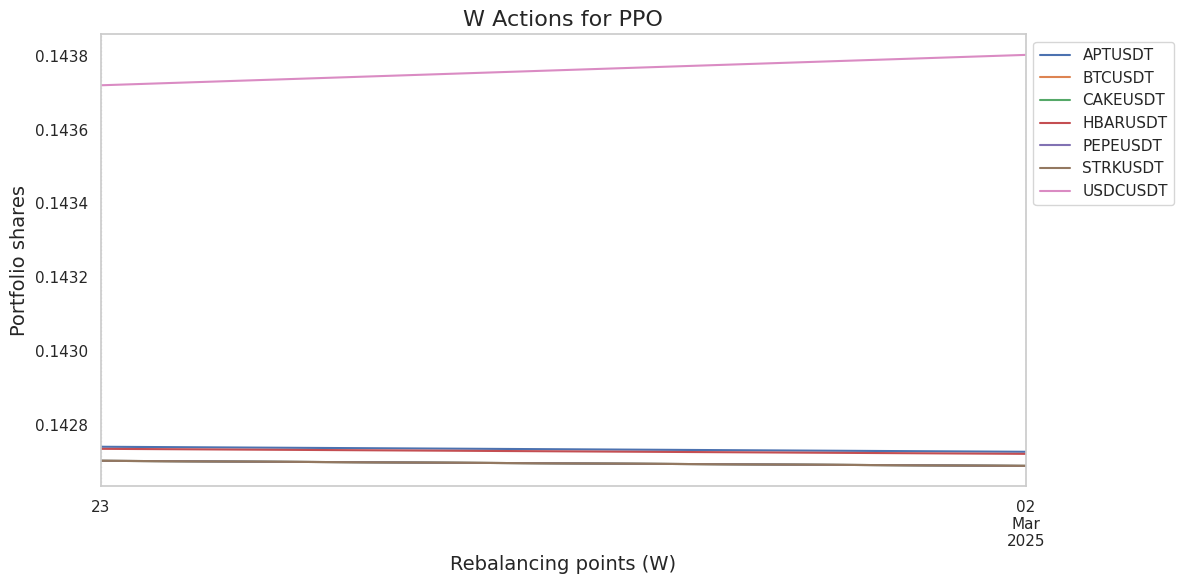

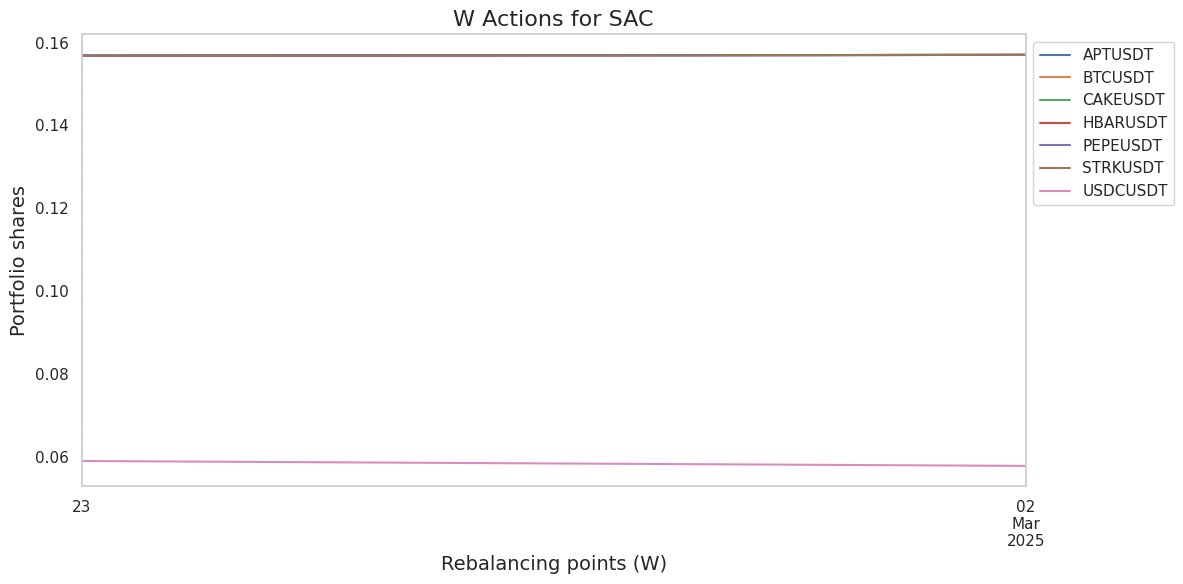

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Конфигурация
DATA_DIR = "../data"
MODELS_PREDICTION_DIR = os.path.join(DATA_DIR, "models_predictions")
MODEL_PREFIX = "model_"  # Префикс для файлов моделей

def plot_hourly_actions(data_dir, model_prefix, resample_period='W'):
    """
    Строит графики действий (долей портфеля) для всех моделей.

    Параметры:
        data_dir (str): Путь к папке с данными.
        model_prefix (str): Префикс для файлов моделей.
        resample_period (str): Период ресемплирования ('H', 'D', 'W').

    Возвращает:
        None
    """
    # Поиск всех файлов с указанным префиксом
    file_pattern = os.path.join(data_dir, f"{model_prefix}*_actions.csv")
    filepaths = [f for f in glob.glob(file_pattern) if os.path.isfile(f)]

    if not filepaths:
        print("Файлы с действиями не найдены.")
        return

    for filepath in filepaths:
        try:
            # Извлекаем название модели из имени файла
            filename = os.path.basename(filepath)
            model_name = filename[len(model_prefix):-len("_actions.csv")].upper()

            # Читаем данные из файла
            actions_df = pd.read_csv(filepath)

            # Убедимся, что столбец 'date' существует
            if 'date' not in actions_df.columns:
                print(f"Файл {filepath} не содержит столбца 'date'. Пропускаем модель {model_name}.")
                continue

            # Преобразуем столбец 'date' в формат datetime и устанавливаем его как индекс
            actions_df['date'] = pd.to_datetime(actions_df['date'])
            actions_df.set_index('date', inplace=True)

            # Ресемплирование данных
            actions_df = actions_df.resample(resample_period).mean()

            # Строим график
            actions_df.plot(figsize=(12, 6), title=f"{resample_period} Actions for {model_name}")
            plt.legend(actions_df.columns, loc='upper left', bbox_to_anchor=(1.0, 1.0))
            plt.grid(axis='y')
            plt.ylabel('Portfolio shares')
            plt.xlabel(f'Rebalancing points ({resample_period})')
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Ошибка при обработке файла {filepath}: {e}")


import glob

# Вызов функции для построения графиков
plot_hourly_actions(
    data_dir=MODELS_PREDICTION_DIR,
    model_prefix=MODEL_PREFIX,
    resample_period='W'  # 'H' (часовой), 'D' (дневной), 'W' (недельный)
)

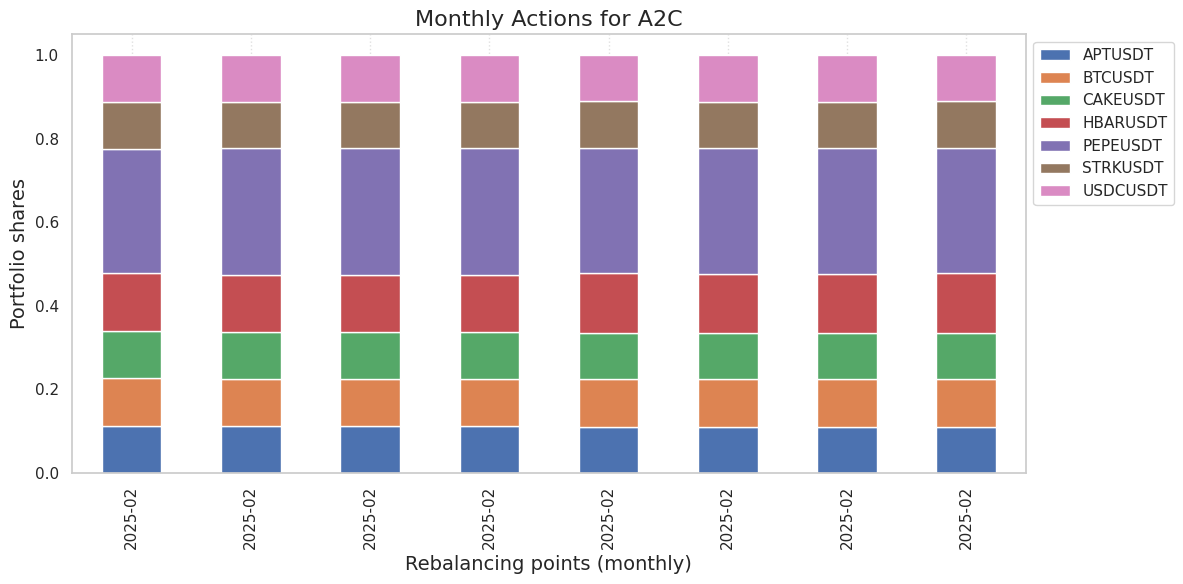

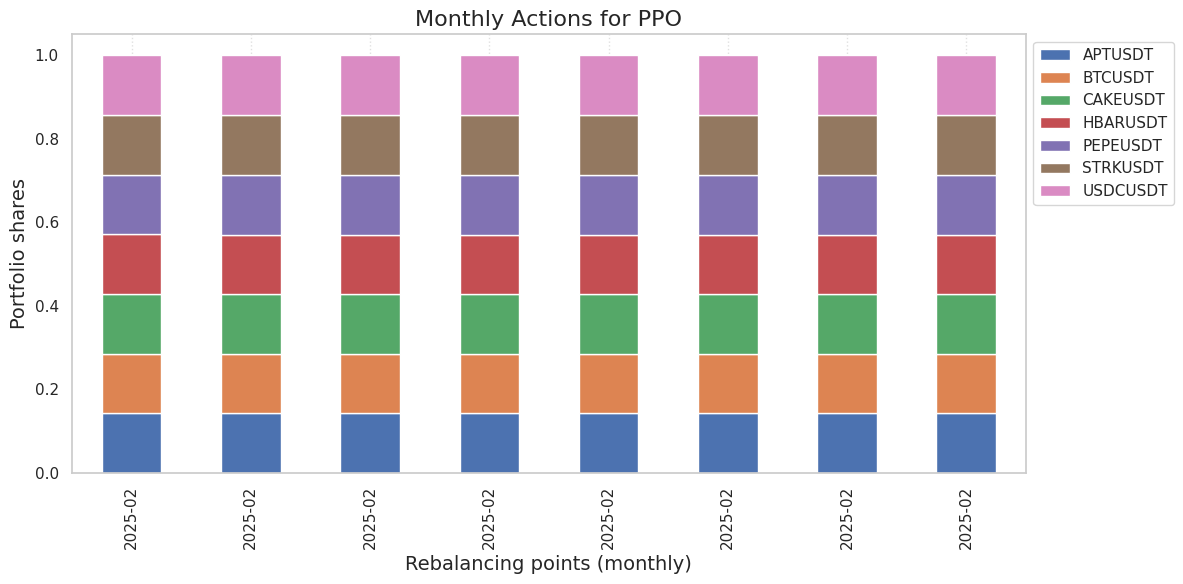

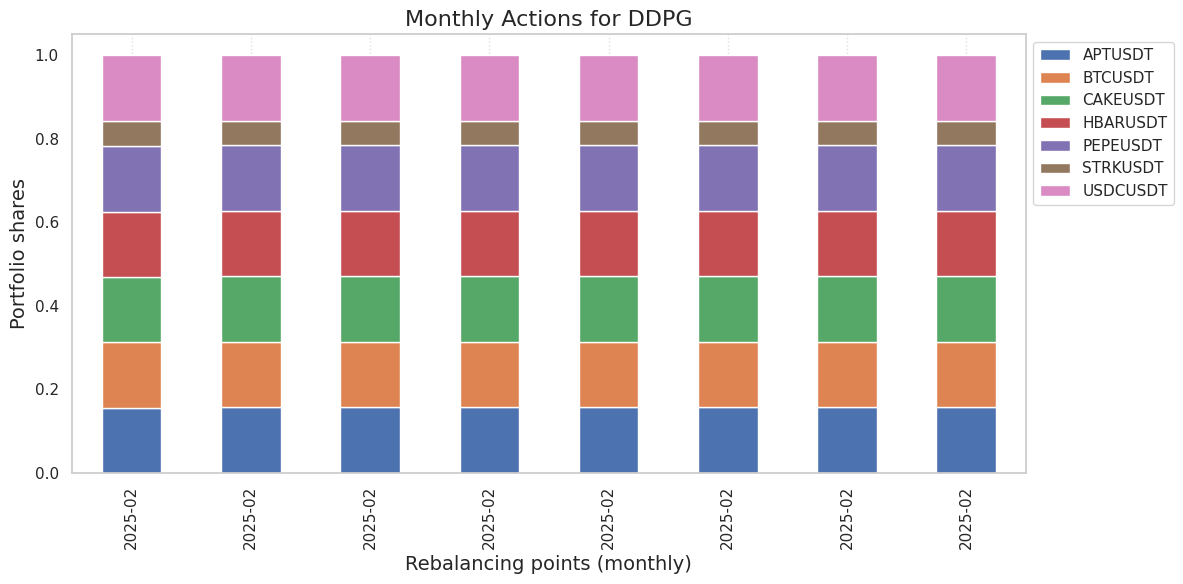

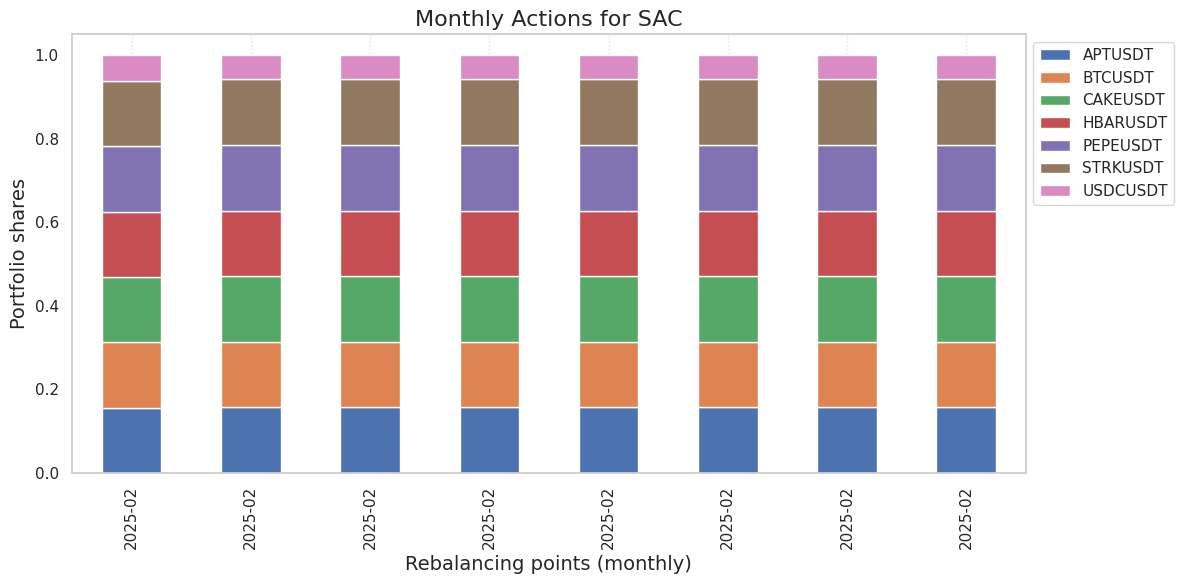

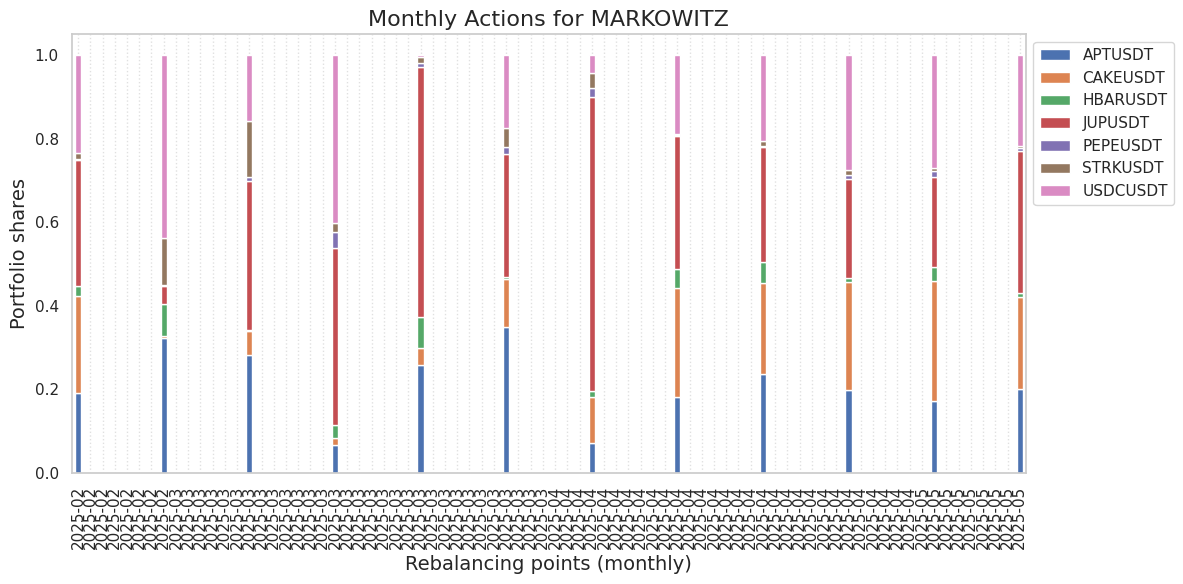

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Конфигурация
DATA_DIR = "../data"
MODELS_PREDICTION_DIR = os.path.join(DATA_DIR, "models_predictions")
DRL_METHODS = ['a2c', 'ppo', 'ddpg', 'sac', 'markowitz']

for method in DRL_METHODS:
    filepath = os.path.join(MODELS_PREDICTION_DIR, f"model_{method}_actions.csv")
    try:
        # Чтение данных
        actions_df = pd.read_csv(filepath)
        actions_df['date'] = pd.to_datetime(actions_df['date'])
        actions_df.set_index('date', inplace=True)

        # Ресемплинг по месяцам и усреднение
        actions_df = actions_df.resample('1D').mean()
        actions_df.index = actions_df.index.strftime('%Y-%m')

        # Построение графика
        actions_df.plot(kind='bar', stacked=True, figsize=(12, 6))
        plt.legend(actions_df.columns, loc='upper left', bbox_to_anchor=(1.0, 1.0))
        plt.grid(axis='y')
        plt.title(f"Monthly Actions for {method.upper()}")
        plt.ylabel('Portfolio shares')
        plt.xlabel('Rebalancing points (monthly)')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Ошибка при обработке файла {filepath}: {e}")

In [22]:
actions_df['APTUSDT'].head(50)

date
2025-02    0.190145
2025-02         NaN
2025-02         NaN
2025-02         NaN
2025-02         NaN
2025-02         NaN
2025-02         NaN
2025-02    0.321882
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03    0.281309
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03    0.065635
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03    0.257778
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-03    0.349115
2025-03         NaN
2025-03         NaN
2025-03         NaN
2025-04         NaN
2025-04         NaN
2025-04         NaN
2025-04    0.072301
2025-04         NaN
2025-04         NaN
2025-04         NaN
2025-04         NaN
2025-04         NaN
2025-04         NaN
2025-04    0.18

Обработка файла: ../data\models_predictions\model_a2c_actions.csv


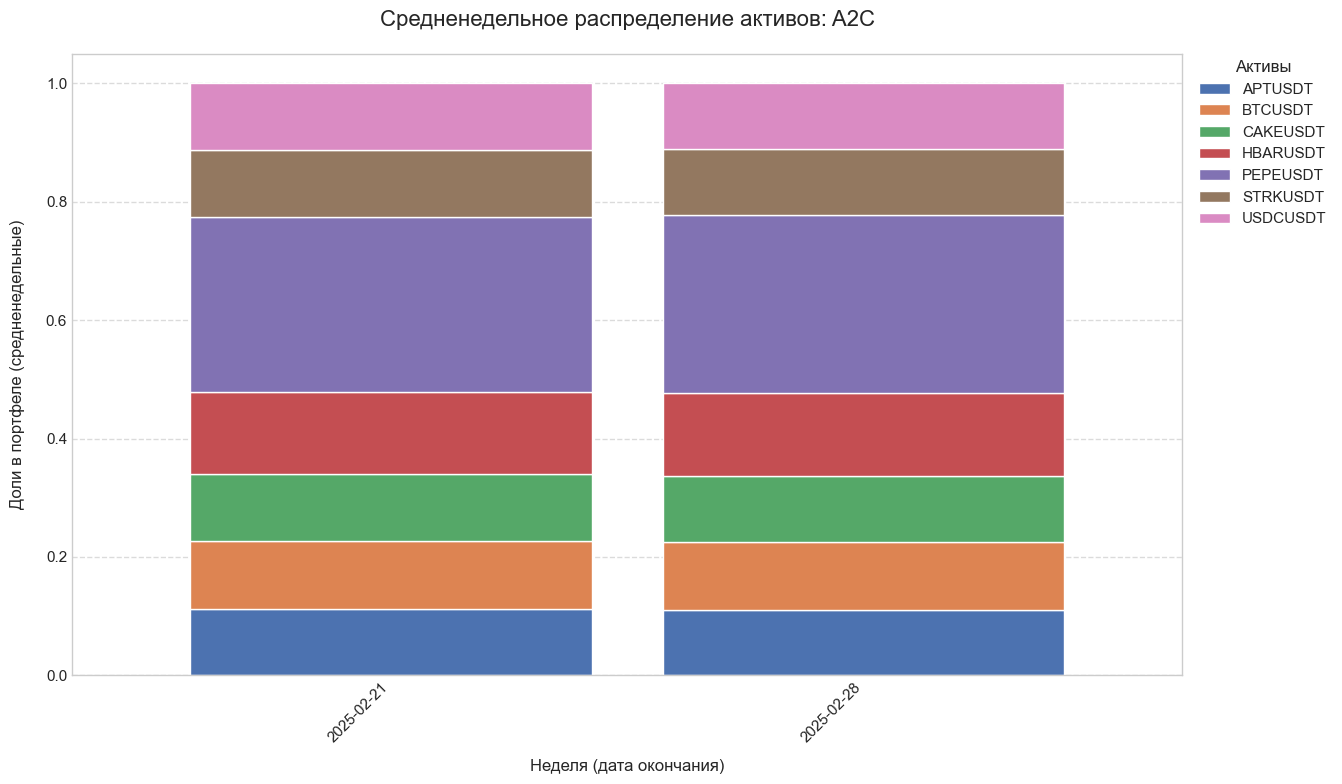

Обработка файла: ../data\models_predictions\model_ppo_actions.csv


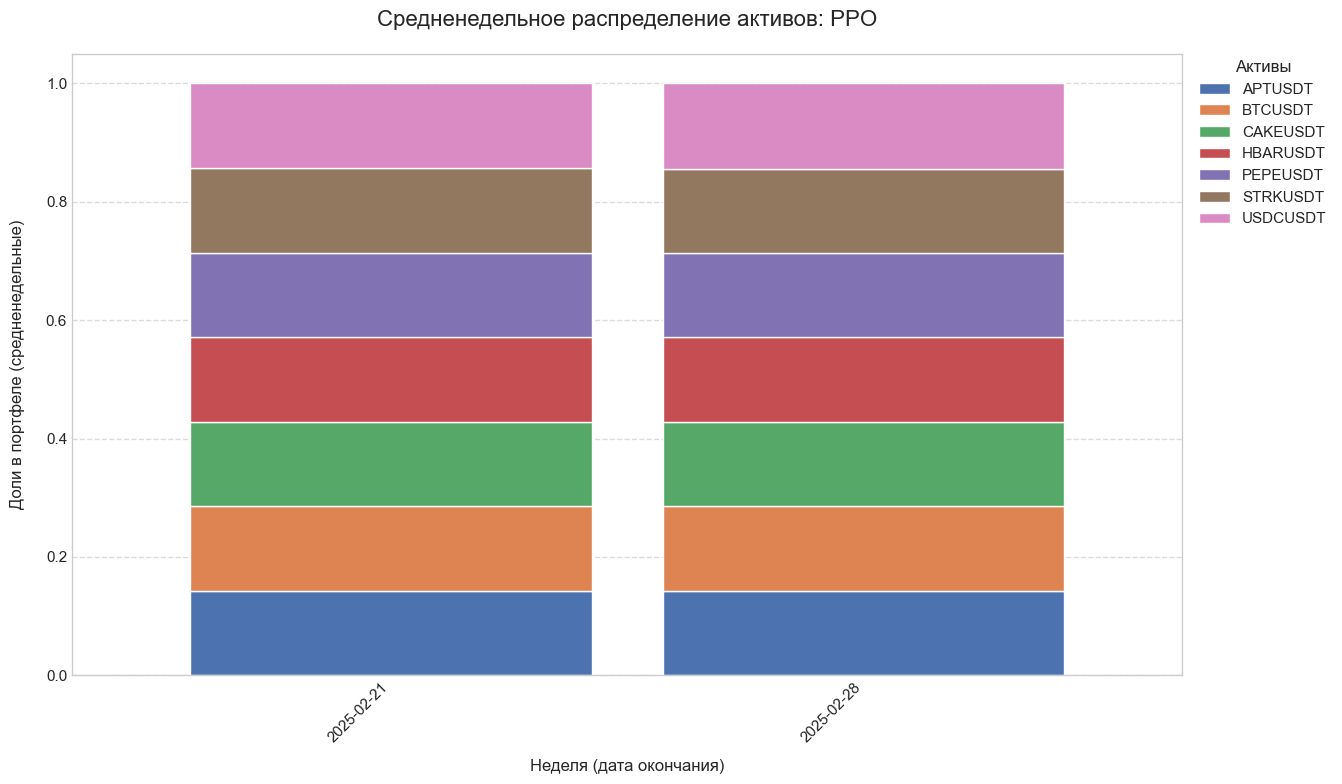

Обработка файла: ../data\models_predictions\model_ddpg_actions.csv


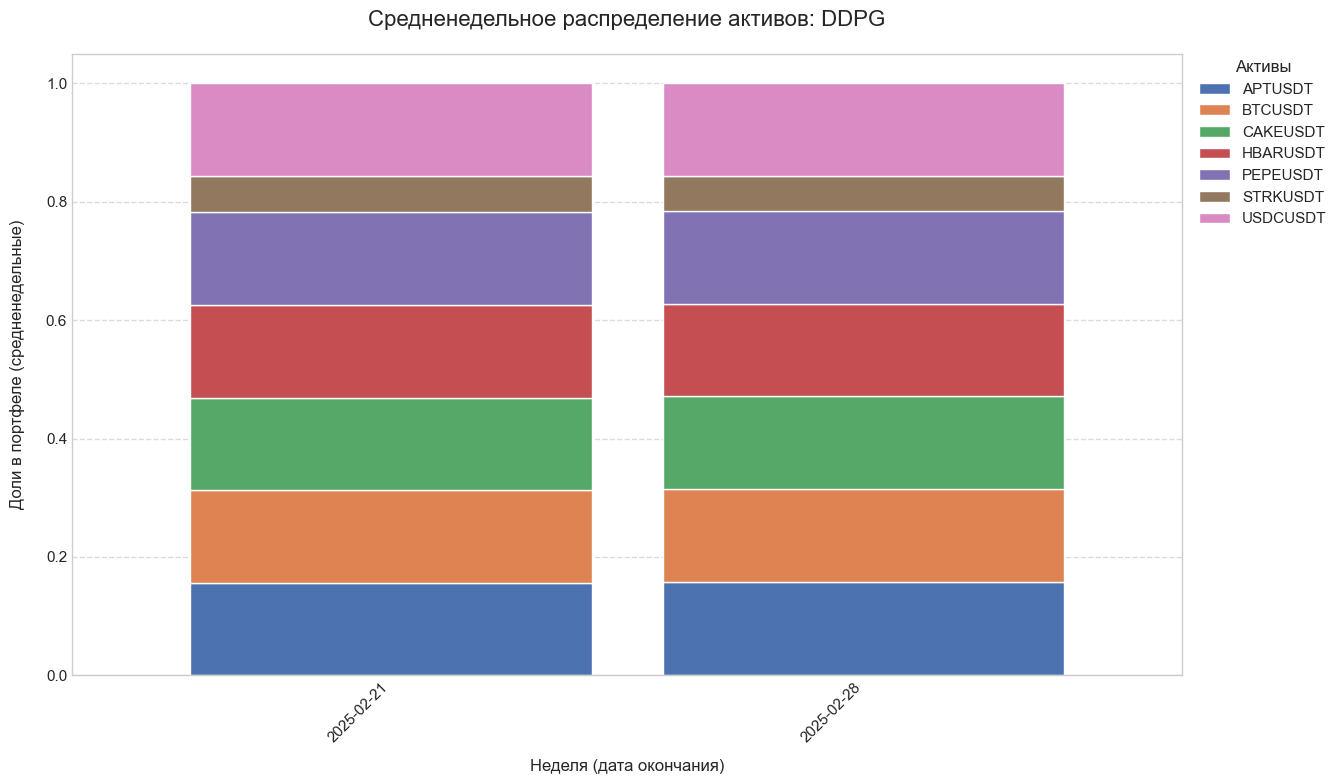

Обработка файла: ../data\models_predictions\model_sac_actions.csv


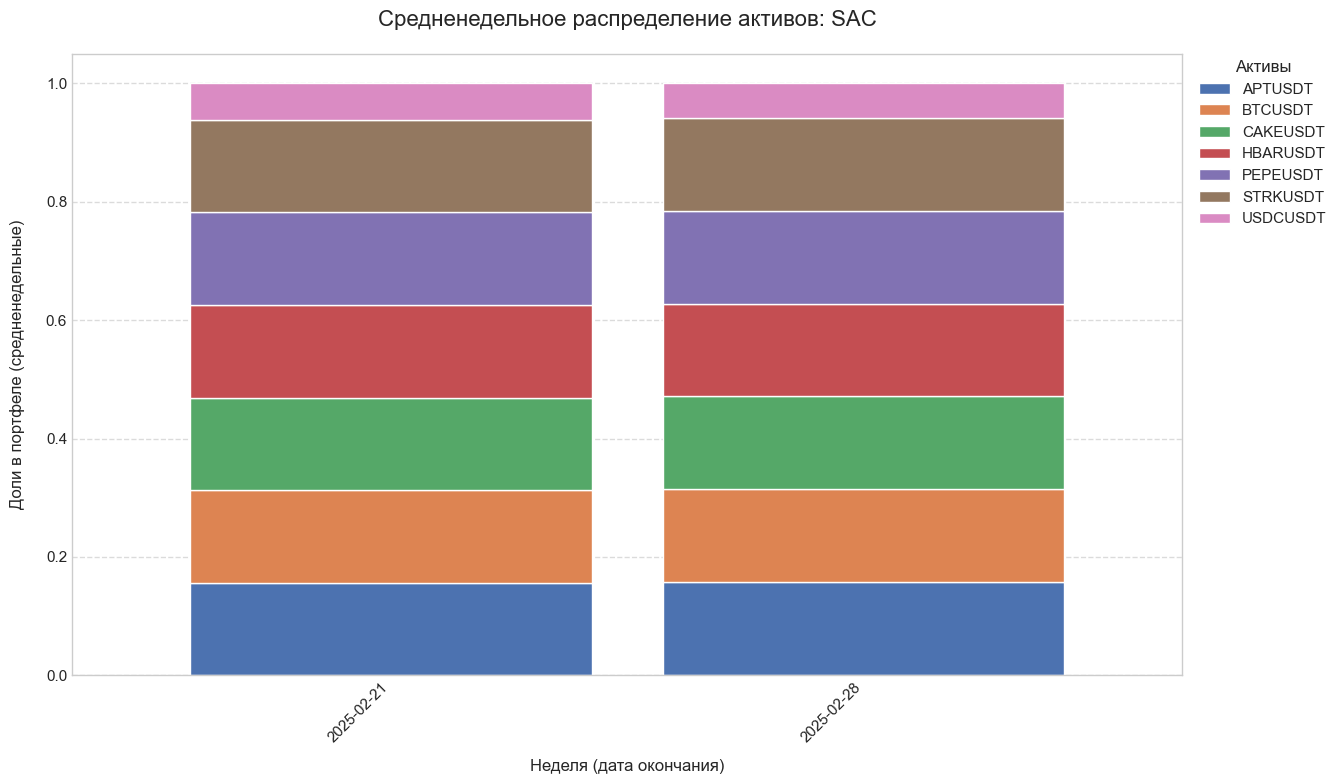

Обработка файла: ../data\models_predictions\model_markowitz_actions.csv


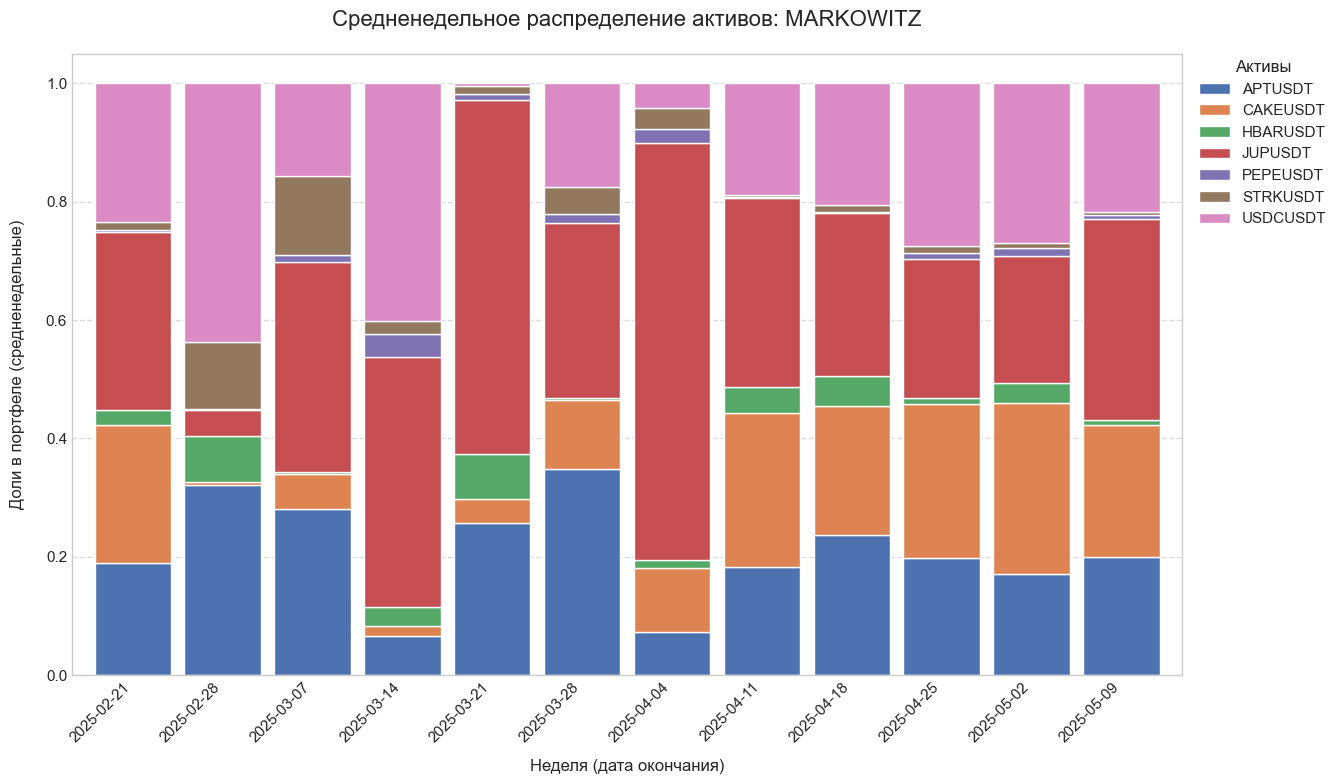

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Для лучшего форматирования дат

# Конфигурация
DATA_DIR = "../data" # Убедитесь, что этот путь корректен
MODELS_PREDICTION_DIR = os.path.join(DATA_DIR, "models_predictions")
DRL_METHODS = ['a2c', 'ppo', 'ddpg', 'sac', 'markowitz']

# Настройка стиля для графиков (опционально)
plt.style.use('seaborn-v0_8-whitegrid')
# Или другой стиль, например:
# plt.style.use('ggplot')
# sns.set_theme(style="whitegrid", rc={"font.family": "DejaVu Sans"}) # Если используется seaborn

for method in DRL_METHODS:
    filepath = os.path.join(MODELS_PREDICTION_DIR, f"model_{method}_actions.csv")
    print(f"Обработка файла: {filepath}")

    try:
        # 1. Чтение данных
        actions_df = pd.read_csv(filepath)

        if 'date' not in actions_df.columns:
            print(f"  Столбец 'date' не найден в файле {filepath}. Пропускаем.")
            continue

        actions_df['date'] = pd.to_datetime(actions_df['date'])
        actions_df.set_index('date', inplace=True)

        if actions_df.empty:
            print(f"  DataFrame пуст после загрузки {filepath}. Пропускаем.")
            continue

        # 2. Ресемплинг до еженедельной частоты и усреднение
        # 'W-FRI' означает "неделя, заканчивающаяся в пятницу".
        # Вы можете использовать 'W' для недели, заканчивающейся в воскресенье,
        # или 'W-MON', 'W-TUE' и т.д., в зависимости от вашей логики ребалансировки.
        # .mean() усреднит доли активов за каждую неделю.
        weekly_actions_df = actions_df.resample('W-FRI').mean()

        # 3. Обработка NaN после ресемплинга
        # Удаляем строки (недели), где все значения NaN (т.е. не было данных за всю неделю)
        weekly_actions_df.dropna(how='all', inplace=True)
        # Оставшиеся NaN (если для какого-то актива не было данных в конкретную неделю,
        # но для других были) заменяем на 0 для корректного stacked bar chart.
        weekly_actions_df.fillna(0, inplace=True)

        if weekly_actions_df.empty:
            print(f"  DataFrame пуст после ресемплинга для {filepath}. Пропускаем.")
            continue

        # 4. Построение графика
        fig, ax = plt.subplots(figsize=(16, 8)) # Увеличим размер для читаемости
        
        # plot вернет объект AxesSubplot, но мы уже передаем ax
        weekly_actions_df.plot(kind='bar', stacked=True, ax=ax, width=0.85)

        # 5. Настройка легенды
        ax.legend(
            title='Активы',
            loc='upper left',
            bbox_to_anchor=(1.01, 1.0), # Размещение справа от графика
            borderaxespad=0.
        )

        # 6. Настройка заголовка и меток осей
        ax.set_title(f"Средненедельное распределение активов: {method.upper()}", fontsize=16, pad=20)
        ax.set_ylabel('Доли в портфеле (средненедельные)', fontsize=12, labelpad=15)
        ax.set_xlabel('Неделя (дата окончания)', fontsize=12, labelpad=10)

        # 7. Форматирование меток оси X
        # Индекс weekly_actions_df теперь является DatetimeIndex с датами конца недели
        # Отображаем дату в формате YYYY-MM-DD
        ax.set_xticklabels(
            [date_obj.strftime('%Y-%m-%d') for date_obj in weekly_actions_df.index],
            rotation=45,
            ha="right" # Выравнивание по правому краю для повернутых меток
        )
        
        # Опционально: если меток слишком много, можно их проредить
        num_weeks = len(weekly_actions_df.index)
        if num_weeks > 20: # Например, если больше 20 недель
            step = num_weeks // 15 # Показать примерно 15 меток
            if step < 1: step = 1
            
            visible_ticks_indices = range(0, num_weeks, step)
            
            new_tick_labels = []
            current_tick_index = 0
            for i in range(num_weeks):
                if current_tick_index < len(visible_ticks_indices) and i == visible_ticks_indices[current_tick_index]:
                    new_tick_labels.append(weekly_actions_df.index[i].strftime('%Y-%m-%d'))
                    current_tick_index += 1
                else:
                    new_tick_labels.append('') # Пустая строка для скрытых меток
            
            ax.set_xticks(range(num_weeks)) # Устанавливаем позиции тиков
            ax.set_xticklabels(new_tick_labels, rotation=45, ha="right")


        # 8. Сетка (только горизонтальная для столбчатой диаграммы)
        ax.yaxis.grid(True, linestyle='--', alpha=0.7)
        ax.xaxis.grid(False)

        # 9. Убедимся, что все помещается, особенно легенда
        # rect=[left, bottom, right, top] - оставляем место справа (0.85 -> 15% для легенды)
        plt.tight_layout(rect=[0, 0, 0.85, 1]) 

        plt.show()

    except FileNotFoundError:
        print(f"  Файл не найден: {filepath}")
    except pd.errors.EmptyDataError:
        print(f"  Файл пуст или содержит некорректные данные: {filepath}")
    except Exception as e:
        print(f"  Произошла ошибка при обработке файла {filepath}: {e}")
        import traceback
        traceback.print_exc() # Для детальной отладки